Importing Ecommerce returns data to clean

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (4)\ecommerce_returns_synthetic_data.csv")


In [3]:
#change the datatype for order date and return date.

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Return_Date'] = pd.to_datetime(df['Return_Date'], errors='coerce')


In [4]:
# To check if we have null values in returned scenario
df['Is_Returned'] = df['Return_Status'].apply(lambda x: 1 if x == 'Returned' else 0)


In [5]:
df.isnull().sum().sort_values(ascending=False)


Days_to_Return      4948
Return_Date         4948
Return_Reason       4948
Order_ID               0
Discount_Applied       0
Shipping_Method        0
Payment_Method         0
User_Location          0
User_Gender            0
User_Age               0
Return_Status          0
Product_ID             0
Order_Quantity         0
Product_Price          0
Product_Category       0
Order_Date             0
User_ID                0
Is_Returned            0
dtype: int64

In [6]:
returned_missing = df[df['Is_Returned'] == 1][['Return_Reason', 'Return_Date', 'Days_to_Return']].isnull().sum()
print(returned_missing)
#there are no missing information in products returned scenario.

Return_Reason     0
Return_Date       0
Days_to_Return    0
dtype: int64


In [7]:
# Dealing with missing values in returned scenario.
df = df[~((df['Is_Returned'] == 1) & (df['Return_Reason'].isnull()))]


In [8]:
df = df[~((df['Is_Returned'] == 1) & (df['Return_Date'].isnull()))]

In [9]:
df = df[~((df['Is_Returned'] == 1) & (df['Days_to_Return'].isnull()))]

In [10]:

print("Final missing values:")
print(df.isnull().sum())


Final missing values:
Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
Is_Returned            0
dtype: int64


In [11]:
df[df['Is_Returned'] == 0][['Return_Reason', 'Return_Date', 'Days_to_Return']].isnull().sum()


Return_Reason     4948
Return_Date       4948
Days_to_Return    4948
dtype: int64

In [12]:
df[df['Is_Returned'] == 1][['Return_Reason', 'Return_Date', 'Days_to_Return']].isnull().sum()
# we have 0 null in orders returned scenario.

Return_Reason     0
Return_Date       0
Days_to_Return    0
dtype: int64

In [13]:
print("Invalid prices:\n", df[df['Product_Price'] <= 0].shape)
print("Invalid quantities:\n", df[df['Order_Quantity'] <= 0].shape)


Invalid prices:
 (0, 18)
Invalid quantities:
 (0, 18)


In [14]:
df = df[(df['Product_Price'] > 0) & (df['Order_Quantity'] > 0)]


In [15]:
print("Remaining invalid values (should be 0):")
print("Price <= 0:", (df['Product_Price'] <= 0).sum())
print("Quantity <= 0:", (df['Order_Quantity'] <= 0).sum())


Remaining invalid values (should be 0):
Price <= 0: 0
Quantity <= 0: 0


Exploratory Data Analysis 

In [16]:
category_return_rate = df.groupby('Product_Category')['Is_Returned'].mean().sort_values(ascending=False)
print("Return Rate by Product Category:\n", category_return_rate)


Return Rate by Product Category:
 Product_Category
Clothing       0.524500
Electronics    0.509320
Books          0.506614
Toys           0.495370
Home           0.490148
Name: Is_Returned, dtype: float64


In [17]:
location_return_rate = df.groupby('User_Location')['Is_Returned'].mean().sort_values(ascending=False)
print("\nReturn Rate by User Location:\n", location_return_rate)



Return Rate by User Location:
 User_Location
City68    0.621053
City71    0.617647
City87    0.611111
City10    0.598039
City19    0.587629
            ...   
City45    0.418367
City46    0.415842
City41    0.415730
City32    0.398148
City25    0.387755
Name: Is_Returned, Length: 100, dtype: float64


In [18]:
shipping_return_rate = df.groupby('Shipping_Method')['Is_Returned'].mean().sort_values(ascending=False)
print("\nReturn Rate by Shipping Method:\n", shipping_return_rate)



Return Rate by Shipping Method:
 Shipping_Method
Next-Day    0.510902
Standard    0.505152
Express     0.499395
Name: Is_Returned, dtype: float64


In [19]:
payment_return_rate = df.groupby('Payment_Method')['Is_Returned'].mean().sort_values(ascending=False)
print("\nReturn Rate by Payment Method:\n", payment_return_rate)



Return Rate by Payment Method:
 Payment_Method
Gift Card      0.515964
Debit Card     0.511155
Credit Card    0.505055
PayPal         0.488306
Name: Is_Returned, dtype: float64


In [20]:
summary = df.groupby(['Product_Category', 'User_Location', 'Shipping_Method', 'Payment_Method'])['Is_Returned'].mean().reset_index()
summary.to_csv("return_rate_summary.csv", index=False)


In [21]:
#visualisation of above analysis.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


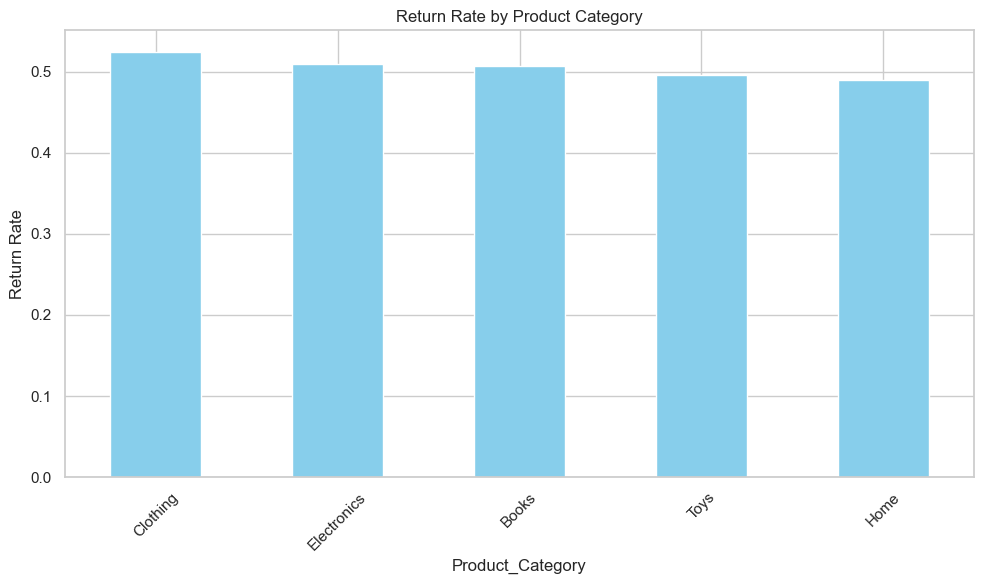

In [22]:
plt.figure(figsize=(10,6))
category_return_rate.plot(kind='bar', color='skyblue')
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


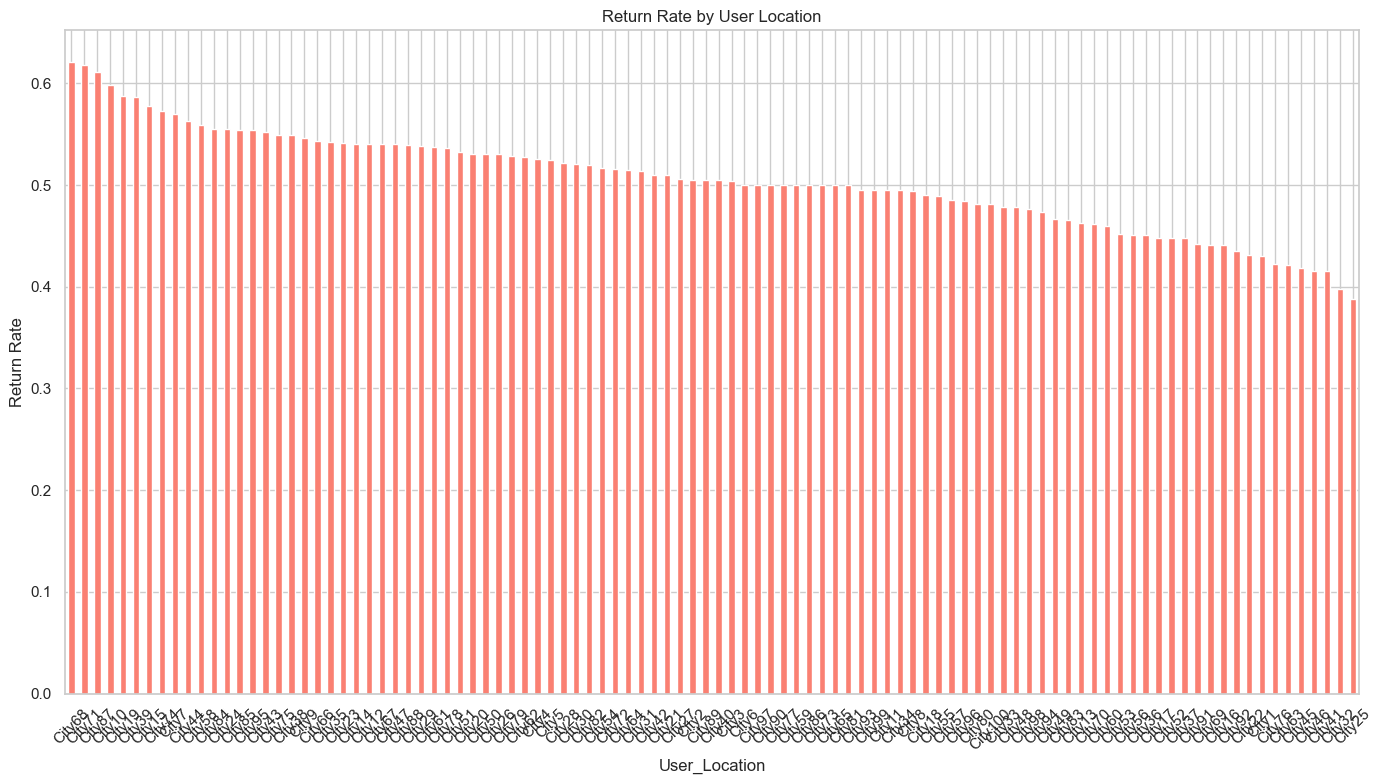

In [23]:
plt.figure(figsize=(14,8))
location_return_rate.plot(kind='bar', color='salmon')
plt.title('Return Rate by User Location')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


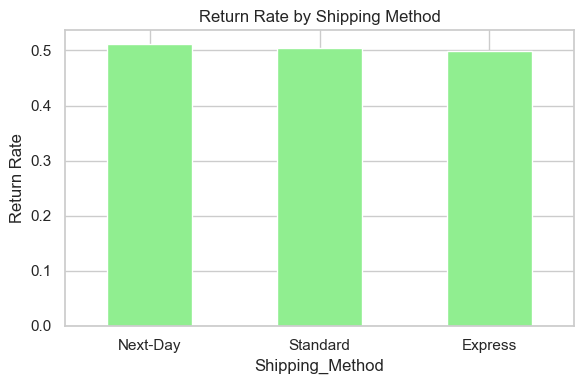

In [24]:
plt.figure(figsize=(6,4))
shipping_return_rate.plot(kind='bar', color='lightgreen')
plt.title('Return Rate by Shipping Method')
plt.ylabel('Return Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


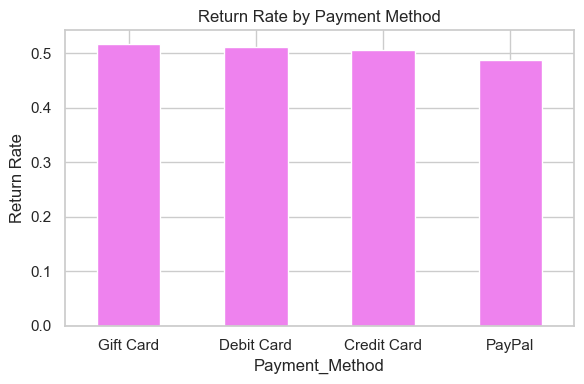

In [25]:
plt.figure(figsize=(6,4))
payment_return_rate.plot(kind='bar', color='violet')
plt.title('Return Rate by Payment Method')
plt.ylabel('Return Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Sqllite database

In [26]:
# save the data in sqlite database and writing queries.
import sqlite3

# Create database connection
conn = sqlite3.connect("ecommerce_returns.db")

# Export DataFrame to SQL table
df.to_sql("returns", conn, if_exists="replace", index=False)

# Verify table creation
print(pd.read_sql("SELECT * FROM returns LIMIT 5", conn))


      Order_ID    Product_ID       User_ID           Order_Date  \
0  ORD00000000  PROD00000000  USER00000000  2023-08-05 00:00:00   
1  ORD00000001  PROD00000001  USER00000001  2023-10-09 00:00:00   
2  ORD00000002  PROD00000002  USER00000002  2023-05-06 00:00:00   
3  ORD00000003  PROD00000003  USER00000003  2024-08-29 00:00:00   
4  ORD00000004  PROD00000004  USER00000004  2023-01-16 00:00:00   

           Return_Date Product_Category  Product_Price  Order_Quantity  \
0  2024-08-26 00:00:00         Clothing         411.59               3   
1  2023-11-09 00:00:00            Books         288.88               3   
2                 None             Toys         390.03               5   
3                 None             Toys         401.09               3   
4                 None            Books         110.09               4   

  Return_Reason Return_Status  Days_to_Return  User_Age User_Gender  \
0  Changed mind      Returned           387.0        58        Male   
1    Wrong

In [27]:
# Return rate by category
query1 = """
SELECT Product_Category, 
       ROUND(AVG(Is_Returned)*100, 2) AS Return_Percentage
FROM returns
GROUP BY Product_Category
ORDER BY Return_Percentage DESC;
"""
print(pd.read_sql(query1, conn))


  Product_Category  Return_Percentage
0         Clothing              52.45
1      Electronics              50.93
2            Books              50.66
3             Toys              49.54
4             Home              49.01


In [28]:
# Return rate by user_location
query2 = """
SELECT User_Location, 
       ROUND(AVG(Is_Returned)*100, 2) AS Return_Percentage
FROM returns
GROUP BY User_Location
ORDER BY Return_Percentage DESC;
"""
print(pd.read_sql(query2, conn))


   User_Location  Return_Percentage
0         City68              62.11
1         City71              61.76
2         City87              61.11
3         City10              59.80
4         City19              58.76
..           ...                ...
95        City45              41.84
96        City46              41.58
97        City41              41.57
98        City32              39.81
99        City25              38.78

[100 rows x 2 columns]


In [29]:
# Return rate by Shipping_Method
query3 = """
SELECT Shipping_Method, 
       ROUND(AVG(Is_Returned)*100, 2) AS Return_Percentage
FROM returns
GROUP BY Shipping_Method
ORDER BY Return_Percentage DESC;
"""
print(pd.read_sql(query3, conn))


  Shipping_Method  Return_Percentage
0        Next-Day              51.09
1        Standard              50.52
2         Express              49.94


In [30]:
df.to_csv("cleaned_ecommerce_returns.csv", index=False)


Logistic Regression for predictig and fnding probablity of the product being returned

In [31]:
features = [
    'Product_Category', 'User_Location', 'Order_Quantity',
    'Product_Price', 'Shipping_Method', 'Payment_Method'
]
X = df[features]
y = df['Is_Returned']


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical = ['Product_Category', 'User_Location', 'Shipping_Method', 'Payment_Method']
numeric = ['Order_Quantity', 'Product_Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ],
    remainder='passthrough'
)


In [33]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Category',
                                                   'User_Location',
                                                   'Shipping_Method',
                                                   'Payment_Method'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [34]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.507
[[470 539]
 [447 544]]
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1009
           1       0.50      0.55      0.52       991

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



predict probabilities

In [35]:
# Get probabilities of being returned (class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Create a DataFrame with predictions and actuals
results = X_test.copy()
results['Actual_Returned'] = y_test.values
results['Return_Probability'] = y_probs

# View top 10 high-risk predictions
results_sorted = results.sort_values(by='Return_Probability', ascending=False)
print(results_sorted.head(10))


     Product_Category User_Location  Order_Quantity  Product_Price  \
2673         Clothing        City71               5         156.48   
7108         Clothing        City71               3         246.99   
9417         Clothing        City71               5         196.97   
8965         Clothing        City71               1         185.11   
7282         Clothing        City71               5         491.32   
8360         Clothing        City87               3          37.37   
3971            Books        City71               2          19.91   
6385         Clothing        City58               2         339.34   
9056            Books        City58               5          31.22   
6029         Clothing        City58               2         303.23   

     Shipping_Method Payment_Method  Actual_Returned  Return_Probability  
2673        Next-Day      Gift Card                1            0.681092  
7108        Next-Day    Credit Card                0            0.676654  
9417

In [36]:
high_risk = results_sorted[results_sorted['Return_Probability'] > 0.7]
high_risk.to_csv("high_risk_returns.csv", index=False)
print("Exported high-risk returns to CSV.")


Exported high-risk returns to CSV.


Add return risk to full data set 

In [37]:
# Use model pipeline to get return probability on full data
df_features = df[features]  # Same features used during training
df['Return_Risk_Score'] = model.predict_proba(df_features)[:, 1]
# 1 very likely be returned
#0 is very unlikely

In [38]:
df.to_csv("ecommerce_returns_with_risk.csv", index=False)
print("Final dataset with return risk score saved.")


Final dataset with return risk score saved.


In [39]:
df.to_csv(r"C:\Users\DELL\Desktop\HASVIK PROFESONAL\elevate labs\project\ecommerce_returns_with_risk.csv", index=False)
# saved the file for creating Dashboard in PowerBI